In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

<IPython.core.display.Javascript object>


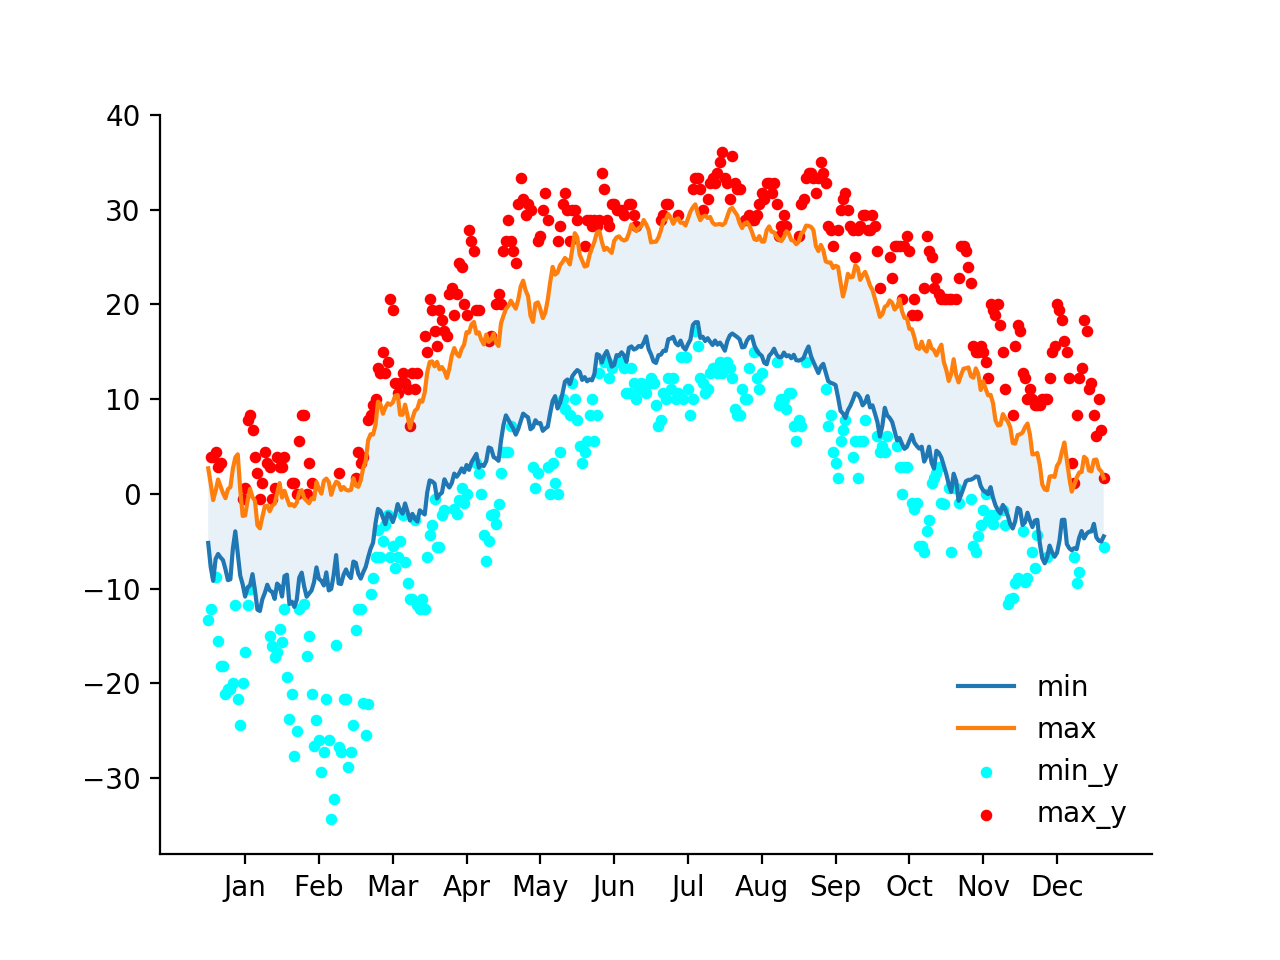

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [87]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.figure()
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df = df.sort(['ID', 'Date'])

df['Year'] = df['Date'].apply(lambda x:x[:4])
df['Month-Day'] = df['Date'].apply(lambda x: x[5:])
df = df[df['Month-Day'] != '02-29']

df_min = df[df["Element"]=="TMIN"]
df_max = df[df["Element"]=="TMAX"]

temp_min = df_min[df_min["Year"]!=2015]
temp_max = df_max[df_max["Year"]!=2015]

temp_min = temp_min.groupby("Month-Day")["Data_Value"].agg({"min":np.mean}).apply(lambda x:x/10)
temp_max = temp_max.groupby("Month-Day")["Data_Value"].agg({"max":np.mean}).apply(lambda x:x/10)

temp_min_15 = df_min[~(df_min["Year"]!='2015')]
temp_max_15 = df_max[~(df_max["Year"]!='2015')]

temp_min_15 = temp_min_15.groupby("Month-Day")["Data_Value"].agg({"min":np.min}).apply(lambda x:x/10)
temp_max_15 = temp_max_15.groupby("Month-Day")["Data_Value"].agg({"max":np.max}).apply(lambda x:x/10)

temp_min.reset_index(inplace=True)
temp_max.reset_index(inplace=True)
temp_min_15.reset_index(inplace=True)
temp_max_15.reset_index(inplace=True)

min_breakers = pd.merge(temp_min,temp_min_15,on="Month-Day")
min_breakers = min_breakers[min_breakers["min_y"]<=min_breakers["min_x"]]

max_breakers = pd.merge(temp_max,temp_max_15,on="Month-Day")
max_breakers = max_breakers[max_breakers["max_y"]>=max_breakers["max_x"]]

plt.plot(temp_min["min"])
plt.plot(temp_max["max"])

plt.scatter(min_breakers.index.tolist(),min_breakers["min_y"],c='cyan',s=10)
plt.scatter(max_breakers.index.tolist(),max_breakers["max_y"],c='red',s=10)

plt.gca().fill_between(range(len(temp_min)),temp_min["min"],temp_max['max'],alpha=0.1)

plt.xlabel = "Months"
plt.ylabel = "Temperature in Celsius"

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

b = [30*i + 15 for i in range(12)]
plt.xticks(b,['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(frameon=False,loc=4)

plt.show()

